# Part II - Prosper Loan Data Exploration
## by Olamide SHOGBAMU

## Investigation Overview

The factors that affects the outcome of a loan is an important topic for every financial institution particularly the ones that give out loans. In this project I used the prosper loan data to look into factor that affect the outcome of a loan and reasons why most people take loans. 



## Dataset Overview

The [Porsper Loan Data](https://raw.githubusercontent.com/TheSHOGBAMU/Data_Visualization/26116c78932bbf835ce492da3635072c302fe75d/ProsperLoanData.csv) has 113937 unique loans in the dataset with 81 features including ListingKey, ListingNumber, ListingCreationDate, Term, LoanStatus, BorrowerAPR, Prosper Score, Loan Status, Loan Original Amount etc. The full dictionary for the column heads can be found [here](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing)

I approached this problem using Matplotlib and Seaborn's visualization tools. I plotted a group bar plot of prosper score together with other features to visualise this observation. A scatter plot to show the relationship between Prosper Score, Borrowers APR and Lenders Yield which can be used to measure a successful loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
url = "https://raw.githubusercontent.com/TheSHOGBAMU/Data_Visualization/26116c78932bbf835ce492da3635072c302fe75d/ProsperLoanData.csv"

dataset = pd.read_csv(url)

## Visualization 1

> Reason why people take loans?

Here we see that most people take loans to consolidate debt. A large number of people measuring up to 51.2% percentage take loan for this reason, followed by another 14.9% and 9.2% with take loan for reasons they are not willing to disclose and other reasons.

In [3]:
#rename the column to remove the white space in the name

dataset.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

# replace each number in the column with the category they represent

category_list = {0:'Not available', 1:'Debt Consolidation', 2:'Home improvement', 3:'Business', 4:'Personal loan', 5:'Student use', 6:'Auto', 7:'Others', 8:'Baby and Adoption', 9:'Boat', 10:'Cosmetics procedure', 11:'Engagement ring', 12:'Green loan', 13:'Household expenses', 14:'Large purchases', 15:'Medical or Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding'}
dataset.replace({"ListingCategory": category_list}, inplace=True)

dataset['ListingCategory'].sample(5)

2856      Debt Consolidation
106402                Others
18884                 Others
82815          Not available
58358     Debt Consolidation
Name: ListingCategory, dtype: object

In [4]:
# plots the same chart from above proportion on the bars
ls_order = dataset['ListingCategory'].value_counts().index

# gets the maximum proportion
n_listing = dataset['ListingCategory'].value_counts().sum()
max_list_count = dataset['ListingCategory'].value_counts()[0]
max_proportion = max_list_count / n_listing
print(max_proportion)

#create a spread element within the max proportion
tick_props = np.arange(0, max_proportion, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

0.5117564970115064


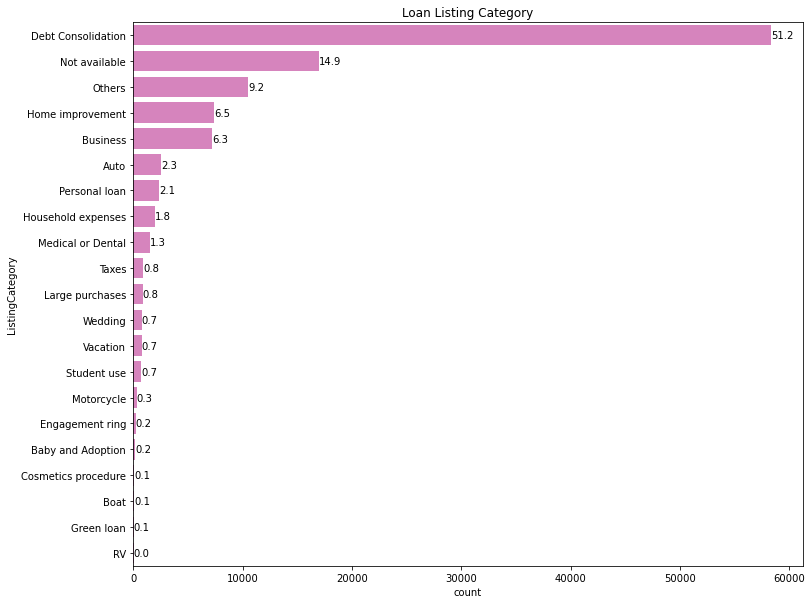

In [5]:
plt.rcParams["figure.figsize"] = (12, 10)
sb.countplot(data=dataset, y='ListingCategory', color=sb.color_palette()[6], order=ls_order);
plt.title('Loan Listing Category')
# print the proportion text on the bars
for i in range (dataset['ListingCategory'].value_counts().shape[0]):
    
    count = dataset['ListingCategory'].value_counts()[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_listing)
    # Print the string value on the bar. 

    plt.text(count+1, i, pct_string, va='center')

## Visualization 2

> The status of the loan is independent of the term of the loan, although the current loans also have the longest term which is 60 month. Every loan status seems to have the same trend.

> Agreeing with the previous plot, people who are employed has the most loan record. Also, people who have  occupation and earns between `$25,000` and `$75,000` annualy has the most loan record count. 

In [6]:
dataset['LoanStatus'] = dataset['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)',
                            'Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')
dataset['LoanStatus'] = dataset['LoanStatus'].replace('FinalPaymentInProgress', 'InProgress')
dataset['LoanStatus'].value_counts()

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2067
InProgress      205
Cancelled         5
Name: LoanStatus, dtype: int64

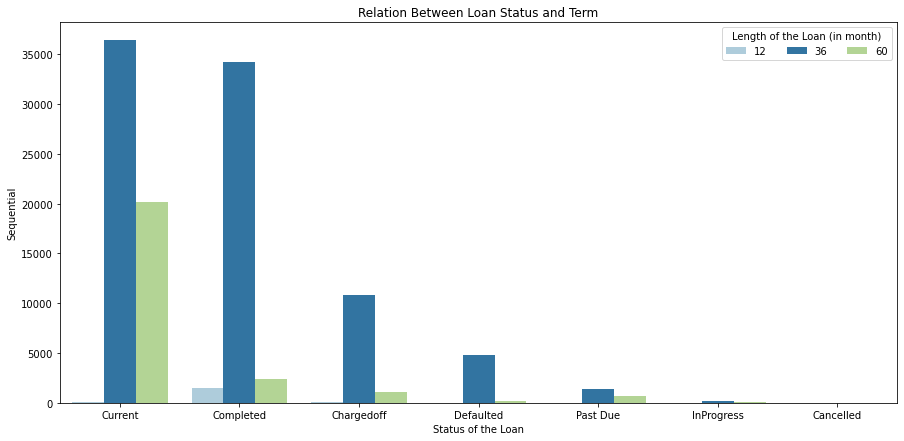

In [7]:
plt.figure(figsize = (15,7))
ax = sb.countplot(data = dataset, x = 'LoanStatus', hue = 'Term', palette = "Paired", order = dataset['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.title('Relation Between Loan Status and Term')
plt.xlabel('Status of the Loan')
plt.ylabel("Sequential");

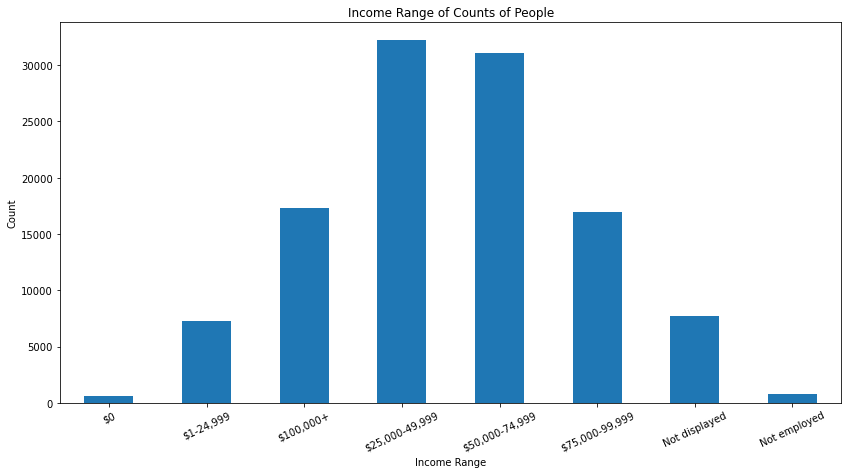

In [8]:
plt.figure(figsize=(14, 7))
IncomeRange_count = dataset.IncomeRange.value_counts().sort_index().plot(kind ='bar')
#decorate_barPlots(IncomeRange_count, title = 'Income rate distribution', direction = 'v')
plt.xlabel('Income Range');
plt.ylabel('Count');
plt.xticks(rotation=25);
plt.title('Income Range of Counts of People');

## Visualization 3

>  The loans with low prosper score has high annual rate. The higher the prosper score the higher the estimated return which inturn makes a profitable loan outcome. 

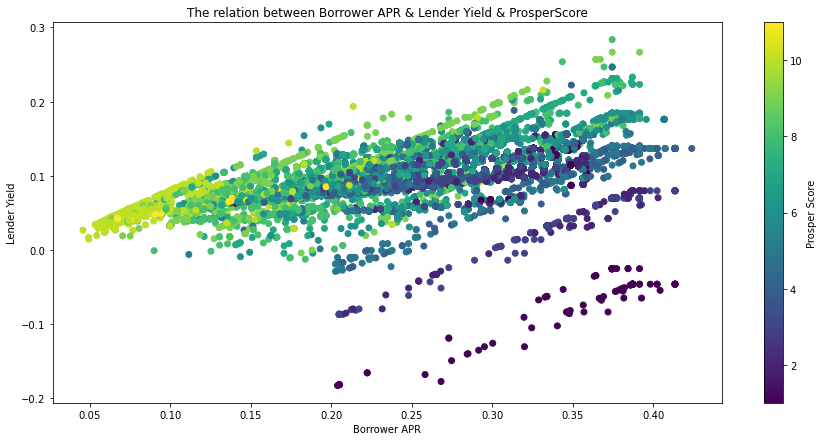

In [9]:
plt.figure(figsize=[15,7])
plt.scatter(data=dataset,x="BorrowerAPR",y = "EstimatedReturn", c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("The relation between Borrower APR & Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

## Conclusion

> As common for every loaning organisations, there are timely redeemers of loan and there people who pass the due date. The customers faithfulness to their loans has been scored and recorded as Proper Score. 

> Prosper Score is one feature that affects the outcome of customer loans. The lower the prosper score the higher the Borrowers Rate which is directly proportional to the Estimated Return and Lenders Yield.

> Although the loan amount ranges from 1,000 to 35,000, the highest loaned amount is between 2,000 to 4000 with the category of employed individual and a reason of debit consolidation. Despite the fact in the home ownership of borrowers accross the year, there is no enough evidence to conclude that borrowers home ownership affects loan.

In [11]:
!jupyter nbconvert Part2-Explanatory_Data_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part2-Explanatory_Data_Analysis.ipynb to slides
[NbConvertApp] Writing 841067 bytes to Part2-Explanatory_Data_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\TGS_PC\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\TGS_PC\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\TGS_PC\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\TGS_PC\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\TGS_PC\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_noteb